In [ ]:
##Major-Project 2 :-
#ML Model for TV shows rating
#Dataset :- https://www.kaggle.com/datasets/titassaha/top-rated-tv-shows

In [14]:
#1.Taking dataset and creating a Dataframe
import pandas as pd
df=pd.read_csv('/content/data_TV.csv')
df

,first_air_date,origin_country,original_language,name,popularity,vote_average,vote_count,overview
0,2021-09-03,US,en,The D'Amelio Show,30.104,9.0,3071,From relative obscurity and a seemingly normal...
1,2008-01-20,US,en,Breaking Bad,468.253,8.8,10131,"When Walter White, a New Mexico chemistry teac..."
2,2021-11-06,US,en,Arcane,95.667,8.7,2615,Amid the stark discord of twin cities Piltover...
3,2013-12-02,US,en,Rick and Morty,1511.996,8.7,7220,Rick is a mentally-unbalanced but scientifical...
4,2022-04-14,US,en,The Kardashians,195.038,8.7,1627,The family you know and love is here with a br...
...,...,...,...,...,...,...,...,...
2612,2002-06-11,US,en,American Idol,34.052,5.2,135,"Each year, hopeful singers from all over the c..."
2613,2000-07-05,US,en,Big Brother,47.029,4.9,190,American version of the reality game show whic...
2614,1997-03-31,GB,en,Teletubbies,36.875,4.1,108,"Pre-school fun, fantasy and education with col..."
2615,1985-02-19,GB,en,EastEnders,108.720,3.9,183,The everyday lives of working-class residents ...


In [15]:
#2.Preprocessing(EDA)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2617 entries, 0 to 2616
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   first_air_date     2611 non-null   object 
 1   origin_country     2617 non-null   object 
 2   original_language  2617 non-null   object 
 3   name               2617 non-null   object 
 4   popularity         2617 non-null   float64
 5   vote_average       2617 non-null   float64
 6   vote_count         2617 non-null   int64  
 7   overview           2552 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 163.7+ KB


In [16]:
df.shape

(2617, 8)

In [17]:
df.size

20936

In [18]:
df.isnull().sum()

first_air_date        6
origin_country        0
original_language     0
name                  0
popularity            0
vote_average          0
vote_count            0
overview             65
dtype: int64

In [19]:
df=df.drop(['overview'],axis=1)
df

,first_air_date,origin_country,original_language,name,popularity,vote_average,vote_count
0,2021-09-03,US,en,The D'Amelio Show,30.104,9.0,3071
1,2008-01-20,US,en,Breaking Bad,468.253,8.8,10131
2,2021-11-06,US,en,Arcane,95.667,8.7,2615
3,2013-12-02,US,en,Rick and Morty,1511.996,8.7,7220
4,2022-04-14,US,en,The Kardashians,195.038,8.7,1627
...,...,...,...,...,...,...,...
2612,2002-06-11,US,en,American Idol,34.052,5.2,135
2613,2000-07-05,US,en,Big Brother,47.029,4.9,190
2614,1997-03-31,GB,en,Teletubbies,36.875,4.1,108
2615,1985-02-19,GB,en,EastEnders,108.720,3.9,183


In [20]:
df.shape

(2617, 7)

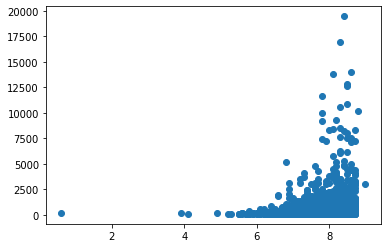

In [22]:
#3.Visualisation
import matplotlib.pyplot as plt
plt.scatter(df['vote_average'],df['vote_count'])

In [21]:
#4.divide the data into input
#Input - vote_count (k), vote_average(1-10) 
x=df.iloc[:,5:8].values
x

array([[9.0000e+00, 3.0710e+03],
       [8.8000e+00, 1.0131e+04],
       [8.7000e+00, 2.6150e+03],
       ...,
       [4.1000e+00, 1.0800e+02],
       [3.9000e+00, 1.8300e+02],
       [6.0000e-01, 1.6200e+02]])

In [23]:
#Now to find out range of number of cluster(k)
import numpy as np
np.sqrt(2617)
#k lies in between 2 and 51

51.15662224971465

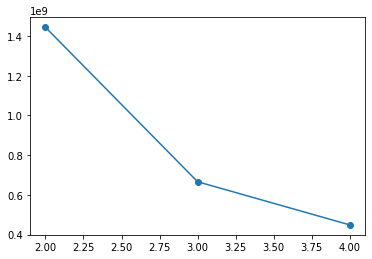

In [31]:
#5.Train and Test variables
#Finding the number of clusters(k)
from sklearn.cluster import KMeans
k = range(2,5)

sse = [] #empty list

for i in k:
  model_demo = KMeans(n_clusters = i,random_state = 0)
  model_demo.fit(x)
  sse.append(model_demo.inertia_)
plt.scatter(k,sse)
plt.plot(k,sse)

2 Clusters , Score = 0.918807194919493
3 Clusters , Score = 0.8314171553645592
4 Clusters , Score = 0.7457739642093048
5 Clusters , Score = 0.7365425841574232
6 Clusters , Score = 0.6955508140758792
7 Clusters , Score = 0.6954019817383416
8 Clusters , Score = 0.6884290592458979
9 Clusters , Score = 0.6616997568160238
10 Clusters , Score = 0.6619943856766348
11 Clusters , Score = 0.6275153412467241
12 Clusters , Score = 0.6168714981200766
13 Clusters , Score = 0.6105621138263164
14 Clusters , Score = 0.6101313439612318
15 Clusters , Score = 0.6111126888089027
16 Clusters , Score = 0.6108250472059312
17 Clusters , Score = 0.6109679274689338
18 Clusters , Score = 0.5827344939981167
19 Clusters , Score = 0.594408763237405
20 Clusters , Score = 0.5848844653068372
21 Clusters , Score = 0.5835046075079302
22 Clusters , Score = 0.5847717740277001
23 Clusters , Score = 0.5835914819835725
24 Clusters , Score = 0.5824820358788314
25 Clusters , Score = 0.5886765295799316
26 Clusters , Score = 0.56

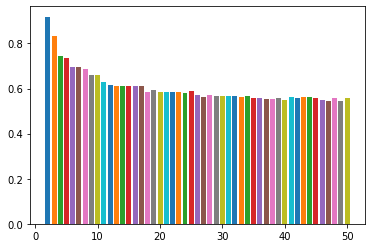

In [32]:
from sklearn.metrics import silhouette_score
k=range(2,51)
for i in k:
  model_demo = KMeans(n_clusters = i,random_state = 0)
  model_demo.fit(x)
  y_pred = model_demo.predict(x)
  print(f'{i} Clusters , Score = {silhouette_score(x,y_pred)}')
  plt.bar(i,silhouette_score(x,y_pred))

In [ ]:
#Confirmation : The number of CLUSTERS to be considered is 2 

In [ ]:
#6.No need for Scaling

In [35]:
#7.Applying Clusterer
k=2
from sklearn.cluster import KMeans
model=KMeans(n_clusters=k,random_state=0)

In [36]:
#8.Fit the model
model.fit(x)

KMeans(n_clusters=2, random_state=0)

In [37]:
#9.Predict the output
y = model.predict(x)
y

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

In [38]:
y.size

2617

In [39]:
x[y==1,1]

array([10131.,  7220.,  4422.,  8355.,  4568., 14027.,  5018.,  4415.,
        7138.,  7575., 10868., 12828., 12599.,  4475.,  7996.,  7563.,
        6187.,  4848., 19459.,  5297.,  8208.,  4781.,  6029.,  7612.,
       10538.,  6216., 16896.,  8512.,  5205.,  4245.,  9319.,  4745.,
        8371., 13802.,  4458.,  5743.,  8295.,  7216.,  9170., 11690.,
        9993.,  7451.,  4273.,  4778.,  5200.])

In [40]:
#Accurracy Score
np.unique(y,return_counts=True)

(array([0, 1], dtype=int32), array([2572,   45]))

In [41]:
2572+45

2617

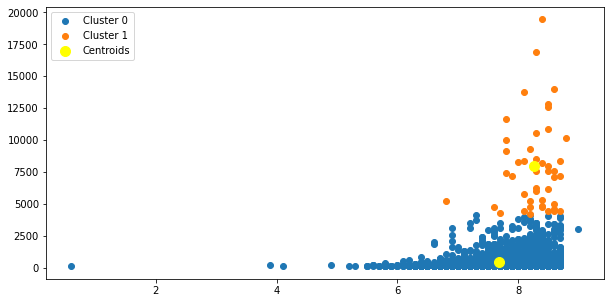

In [42]:
#FINAL VISUALISATION
plt.figure(figsize = (10,5))
for i in range(k):
  plt.scatter(x[y == i,0],x[y == i,1],label = f'Cluster {i}')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s = 100,c = 'yellow',label = 'Centroids')
plt.legend()